## LeNet-5 Architecture On CIFAR-10 Dataset

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL.Image
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

In [4]:
# Load CIFAR-10 Dataset from keras dataset
cifar = tf.keras.datasets.cifar10
(train_images, train_labels),(test_images, test_labels) = cifar.load_data()

In [5]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
# Scale the image data
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [9]:
# One-hot Encode the Labels
classes_no = len(np.unique(train_labels))
train_labels = tf.keras.utils.to_categorical(train_labels, classes_no)
test_labels = tf.keras.utils.to_categorical(test_labels, classes_no)

In [10]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

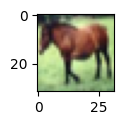

In [11]:
# Show a single image
plt.figure(figsize=(1,1))
plt.imshow(train_images[7])
plt.show()

In [12]:
# Split Train images into Train and Validation Images
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.20, random_state=42
)

In [13]:
train_images.shape, validation_images.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [14]:
train_labels.shape, validation_labels.shape

((40000, 10), (10000, 10))

In [15]:
# Make the Convolution Layers
layers = [
    tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation='tanh', padding='valid', input_shape=(32,32,3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax') 
]

model_clf = tf.keras.models.Sequential(layers)

In [16]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [17]:
# Compile The model
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
model_clf.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [18]:
# Train the Model

# Callback Function
checkpoint = ModelCheckpoint(filepath='artifacts/lenet5.h5', save_best_only=True, save_weights_only=False)
history = model_clf.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2, callbacks=[checkpoint], validation_data=(validation_images, validation_labels), verbose=1)

Epoch 1/20


2023-08-20 14:45:28.266137: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


313/313 [==============================] - 7s 19ms/step - loss: 1.8727 - accuracy: 0.3320 - val_loss: 1.7505 - val_accuracy: 0.3808
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 1.7008 - accuracy: 0.4047 - val_loss: 1.6422 - val_accuracy: 0.4232
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 1.5834 - accuracy: 0.4401 - val_loss: 1.5619 - val_accuracy: 0.4441
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 1.4969 - accuracy: 0.4676 - val_loss: 1.4937 - val_accuracy: 0.4611
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 1.4273 - accuracy: 0.4948 - val_loss: 1.4399 - val_accuracy: 0.4833
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 1.3681 - accuracy: 0.5139 - val_loss: 1.4079 - val_accuracy: 0.5011
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 1.3210 - accuracy: 0.5311 - val_loss: 1.3746 - val_accuracy: 0.5119
Epoch 8/20

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 313}

In [20]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.872689,0.331950,1.750520,0.3808
1,1.700824,0.404650,1.642249,0.4232
2,1.583384,0.440050,1.561871,0.4441
3,1.496912,0.467625,1.493748,0.4611
4,1.427298,0.494775,1.439940,0.4833
5,1.368129,0.513875,1.407879,0.5011
6,1.321003,0.531050,1.374632,0.5119
7,1.279103,0.547825,1.358884,0.5144
8,1.240447,0.561200,1.344146,0.5225
9,1.204574,0.573250,1.341761,0.5257


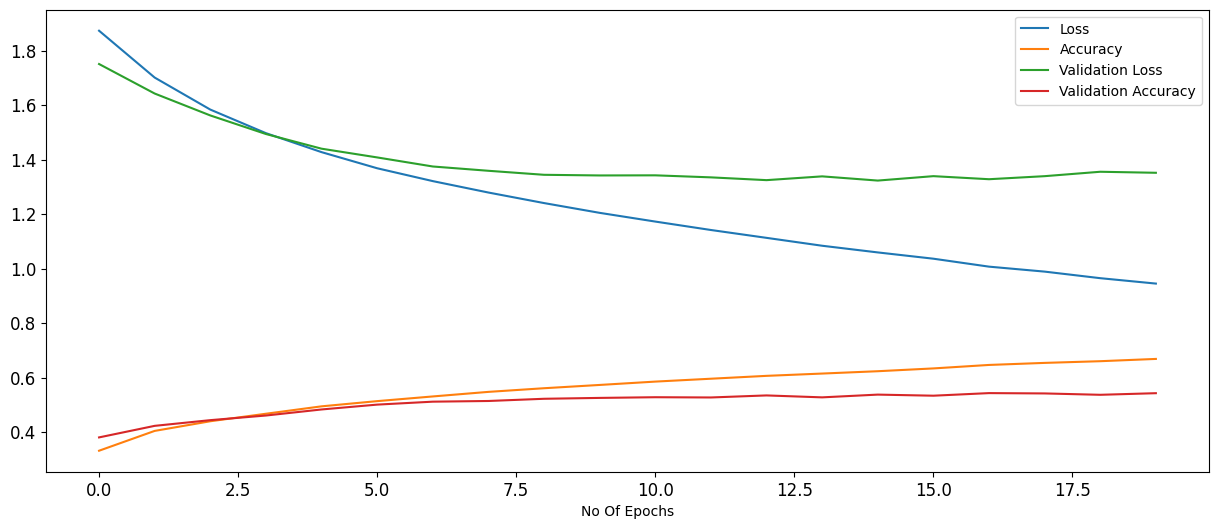

In [21]:
# Plot loss and accuracy history per epoch
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(history.history))
plt.xlabel("No Of Epochs")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Loss','Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [22]:
# Evaluate the Model
model_clf.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3403 - accuracy: 0.5391


[1.3402785062789917, 0.5390999913215637]

In [23]:
# Predict the model
actual_image = train_images[0]
actual_label = train_labels[0]
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_predict = model_clf.predict(np.expand_dims(actual_image, axis=0))
np.argmax(y_predict)

1/1 [==============================] - 0s 77ms/step


6

In [24]:
cifar10_labels[np.argmax(y_predict)]

'frog'

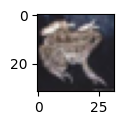

In [25]:
plt.figure(figsize=(1,1))
plt.imshow(actual_image)
plt.show()

In [26]:
y_predict = model_clf.predict(test_images)

313/313 [==============================] - 1s 3ms/step


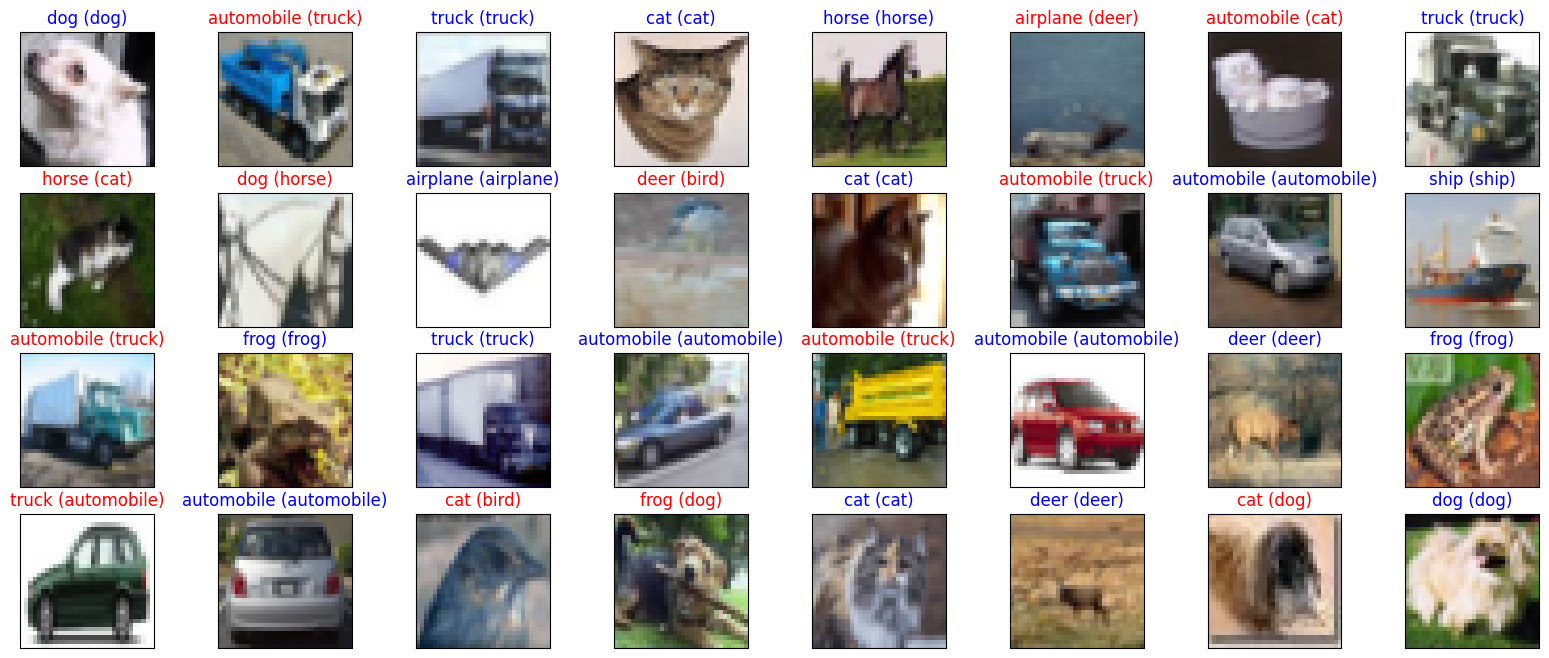

In [27]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_predict[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [28]:
# Now Use the Model

In [29]:
# Load the Model
model = load_model('artifacts/lenet5.h5')
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

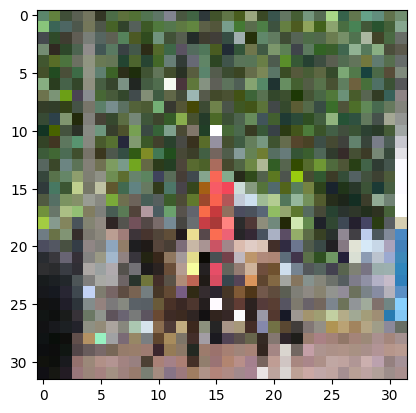

In [33]:
# input_image = PIL.Image.open('artifacts/demo.jpg')
input_image = tf.keras.utils.load_img('artifacts/demo.jpg', target_size=(32,32))
input_image = tf.keras.utils.img_to_array(input_image)
input_image = input_image/255
plt.imshow(input_image)
plt.show()

In [34]:
input_image = np.expand_dims(input_image, axis=0)
y_pred = model.predict(input_image)
np.argmax(y_pred)
cifar10_labels[np.argmax(y_pred)]

1/1 [==============================] - 0s 16ms/step


'deer'

In [35]:
## Image 01

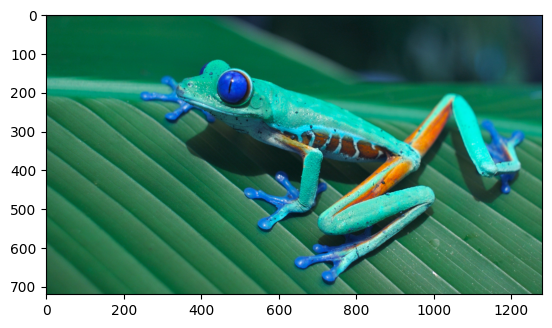

In [46]:
demo_img = cv2.imread('artifacts/frog.png')
plt.imshow(demo_img)
plt.show()

In [47]:
demo_img = cv2.resize(demo_img, (32,32))
demo_img = demo_img.astype('float32')/255
demo_img = np.expand_dims(demo_img, axis=0)

In [48]:
prediction = model.predict(demo_img)
predicted_class = np.argmax(prediction)
cifar10_labels[predicted_class]

1/1 [==============================] - 0s 15ms/step


'bird'